In [8]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Load data with specified dtypes
dtype_dict = {
    'Promo': str,
    'StateHoliday': str
}

train_data = pd.read_csv(r'D:\Week4\data\train.csv', dtype=dtype_dict)

# Inspect the unique values in 'StateHoliday'
print(train_data['StateHoliday'].unique())

# Step 1: Standardize the data in 'StateHoliday'
train_data['StateHoliday'] = train_data['StateHoliday'].replace({'0': 'No Holiday', 'a': 'Holiday A', 'b': 'Holiday B', 'c': 'Holiday C'})

# Optional: Convert to categorical type for better performance
train_data['StateHoliday'] = train_data['StateHoliday'].astype('category')

# Verify changes
print(train_data['StateHoliday'].unique())
print(train_data.head())

# Save the modified DataFrame back to the original CSV file
train_data.to_csv(r'D:\Week4\data\train.csv', index=False)

['No Holiday' 'Holiday A' 'Holiday B' 'Holiday C']
['No Holiday', 'Holiday A', 'Holiday B', 'Holiday C']
Categories (4, object): ['Holiday A', 'Holiday B', 'Holiday C', 'No Holiday']
   Store  DayOfWeek        Date  Sales  Customers  Open Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1     1   No Holiday   
1      2          5  2015-07-31   6064        625     1     1   No Holiday   
2      3          5  2015-07-31   8314        821     1     1   No Holiday   
3      4          5  2015-07-31  13995       1498     1     1   No Holiday   
4      5          5  2015-07-31   4822        559     1     1   No Holiday   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [15]:
train_data = pd.read_csv(r'D:\Week4\data\train.csv')
test_data = pd.read_csv(r'D:\Week4\data\test.csv')
store_data = pd.read_csv(r'D:\Week4\data\store.csv')
# Display the columns in the training and test datasets
print("Training Set Columns:", train_data.columns.tolist())
print("Test Set Columns:", test_data.columns.tolist())
print("store Set Columns:", store_data.columns.tolist())

Training Set Columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
Test Set Columns: ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
store Set Columns: ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [11]:
# Check for missing values
missing_train = train_data.isnull().sum()
missing_test = test_data.isnull().sum()
# Count of missing values in each column
missing_values = train_data.isnull().sum()
print(missing_values)

# Count of missing values in each column of the test dataset
missing_values_test = test_data.isnull().sum()
print(missing_values_test)

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


 Check for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

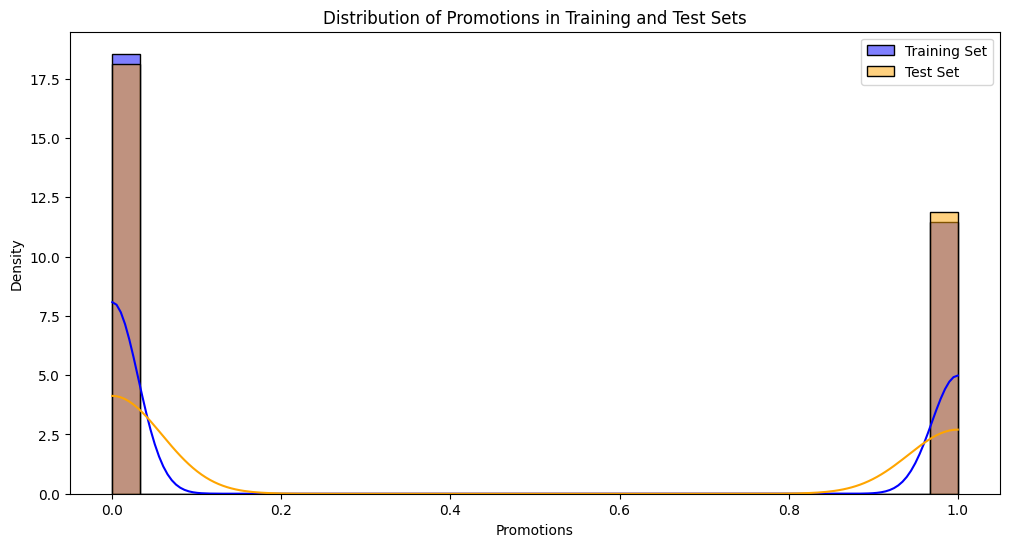

Training Set Promo Statistics:
count    1.017209e+06
mean     3.815145e-01
std      4.857586e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: Promo, dtype: float64

Test Set Promo Statistics:
count    41088.000000
mean         0.395833
std          0.489035
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Promo, dtype: float64


In [12]:
# Visualize the distribution of promotions in both datasets
plt.figure(figsize=(12, 6))
sns.histplot(train_data['Promo'], kde=True, label='Training Set', color='blue', stat='density', bins=30)
sns.histplot(test_data['Promo'], kde=True, label='Test Set', color='orange', stat='density', bins=30)
plt.legend()
plt.title('Distribution of Promotions in Training and Test Sets')
plt.xlabel('Promotions')
plt.ylabel('Density')
plt.show()
# Summary statistics for the Promo column
train_promo_stats = train_data['Promo'].describe()
test_promo_stats = test_data['Promo'].describe()

print("Training Set Promo Statistics:")
print(train_promo_stats)
print("\nTest Set Promo Statistics:")
print(test_promo_stats)

In [13]:
# Convert 'Date' to datetime format
train_data['Date'] = pd.to_datetime(train_data['Date'])
test_data['Date'] = pd.to_datetime(test_data['Date'])

 Check & compare sales behavior before, during, and after holidays

In [14]:
# Check if train_data is empty
if train_data.empty:
    print("train_data is empty.")

# Ensure holidays is in datetime format
holidays = pd.to_datetime(holidays)

# Ensure train_data['Date'] is also in datetime format
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Set default holiday flag
train_data['holiday_flag'] = 0  # Default: no holiday

# Set holiday flag based on holidays list
train_data.loc[train_data['Date'].isin(holidays), 'holiday_flag'] = 2  # During holiday

# Create the bar plot with updated Seaborn call
sns.barplot(hue='holiday_flag', x='holiday_flag', y='Sales', data=avg_sales, palette='coolwarm', legend=False)  # Updated

NameError: name 'holidays' is not defined

In [85]:
# Check for missing values and data types
print(train_data.isnull().sum())
print(train_data.dtypes)

# Convert relevant columns to numeric, if they are not already
train_data['Sales'] = pd.to_numeric(train_data['Sales'], errors='coerce')
train_data['Customers'] = pd.to_numeric(train_data['Customers'], errors='coerce')

# Fill missing values or drop rows/columns
train_data.ffill(inplace=True)

# Detect outliers using IQR for numeric columns only
numeric_cols = ['Sales', 'Customers']

Q1 = train_data[numeric_cols].quantile(0.25)
Q3 = train_data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
outlier_condition = (train_data[numeric_cols] < (Q1 - 1.5 * IQR)) | (train_data[numeric_cols] > (Q3 + 1.5 * IQR))
train_data = train_data[~outlier_condition.any(axis=1)]  # Remove outliers

# Convert date columns to datetime
train_data.loc[:, 'Date'] = pd.to_datetime(train_data['Date'])

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
holiday_flag     0
dtype: int64
Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
holiday_flag              int64
dtype: object


 Find out any seasonal (Christmas, Easter, etc) purchase behaviors,

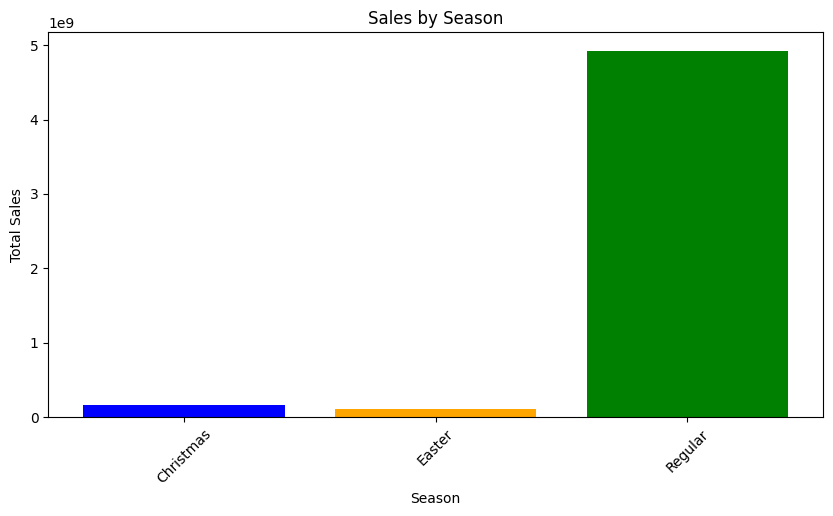

In [86]:
# Define seasons
def get_season(date):
    if date.month == 12 and date.day >= 20:  # Christmas season
        return 'Christmas'
    elif date.month == 1 and date.day <= 5:  # Post-Christmas
        return 'Christmas'
    elif date.month == 4 and (date.day >= 15 and date.day <= 21):  # Easter season
        return 'Easter'
    # Add other seasons as needed
    return 'Regular'

# Apply the season function
train_data['Season'] = train_data['Date'].apply(get_season)

# Aggregate sales by season
seasonal_sales = train_data.groupby('Season').agg({'Sales': 'sum', 'Customers': 'sum'}).reset_index()

# Visualize the results
plt.figure(figsize=(10, 5))
plt.bar(seasonal_sales['Season'], seasonal_sales['Sales'], color=['blue', 'orange', 'green'])
plt.title('Sales by Season')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

 What can you say about the correlation between sales and the number of customers?

Correlation between Sales and Customers: 0.91


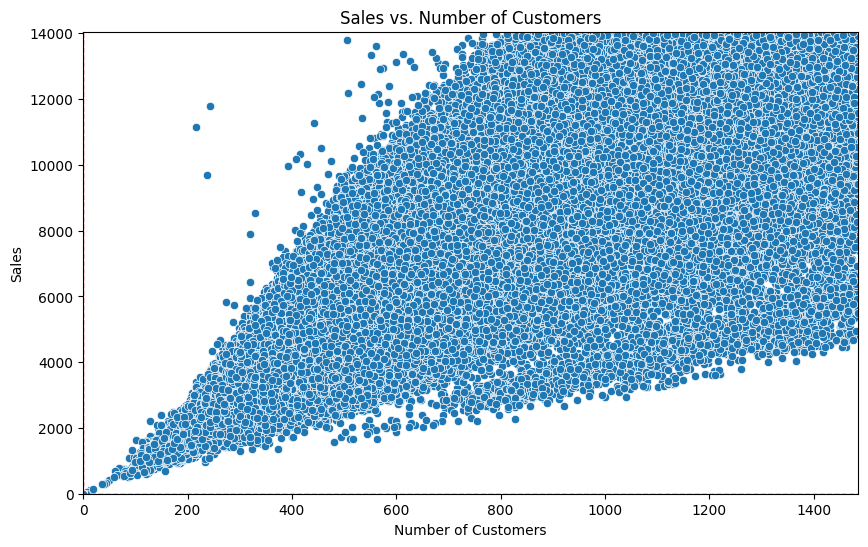

In [87]:
# Calculate correlation
correlation = train_data['Sales'].corr(train_data['Customers'])
print(f'Correlation between Sales and Customers: {correlation:.2f}')

# Visualize the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_data, x='Customers', y='Sales')
plt.title('Sales vs. Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.xlim(0, train_data['Customers'].max())  # Adjust limits if necessary
plt.ylim(0, train_data['Sales'].max())      # Adjust limits if necessary
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add a horizontal line at y=0
plt.axvline(0, color='red', linestyle='--', linewidth=1)  # Add a vertical line at x=0
plt.show()

 How does promo affect sales? 

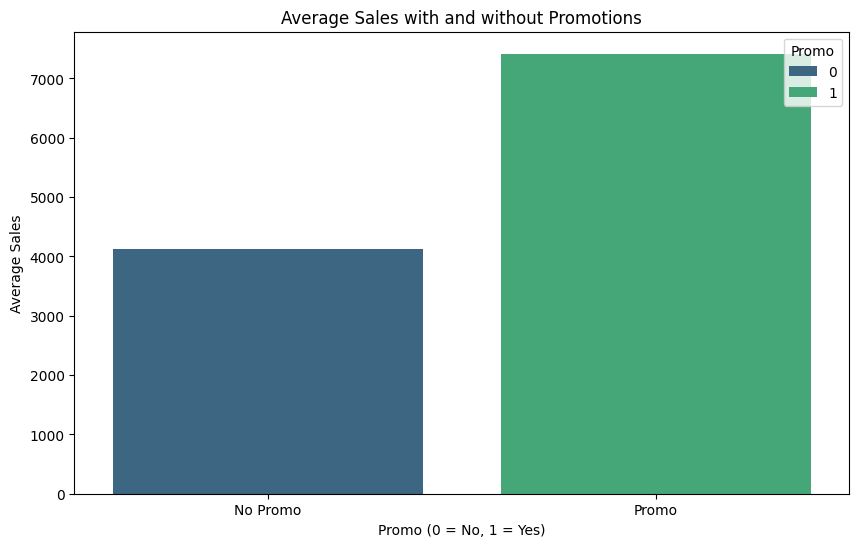

In [88]:
# Visualize average sales during promotions
plt.figure(figsize=(10, 6))
sns.barplot(data=promo_sales, x='Promo', y='Sales', hue='Promo', palette='viridis', dodge=False)
plt.title('Average Sales with and without Promotions')
plt.xlabel('Promo (0 = No, 1 = Yes)')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.legend(title='Promo', loc='upper right')  # Optional: add legend if needed
plt.show()

 Are the promos attracting more customers? 

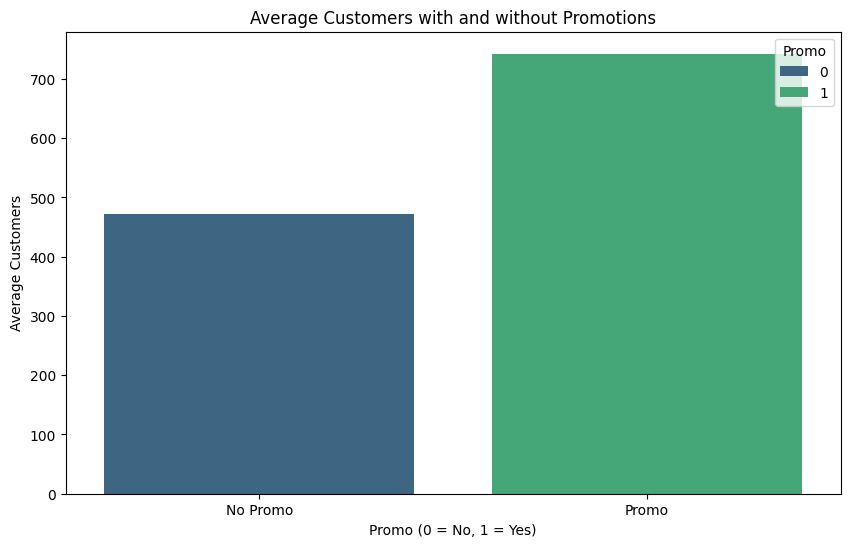

In [90]:
# Visualize average customers during promotions
plt.figure(figsize=(10, 6))
sns.barplot(data=promo_customers, x='Promo', y='Customers', hue='Promo', palette='viridis', dodge=False)
plt.title('Average Customers with and without Promotions')
plt.xlabel('Promo (0 = No, 1 = Yes)')
plt.ylabel('Average Customers')
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.legend(title='Promo', loc='upper right')  # Optional: add legend if needed
plt.show()

 How does it affect already existing customers?

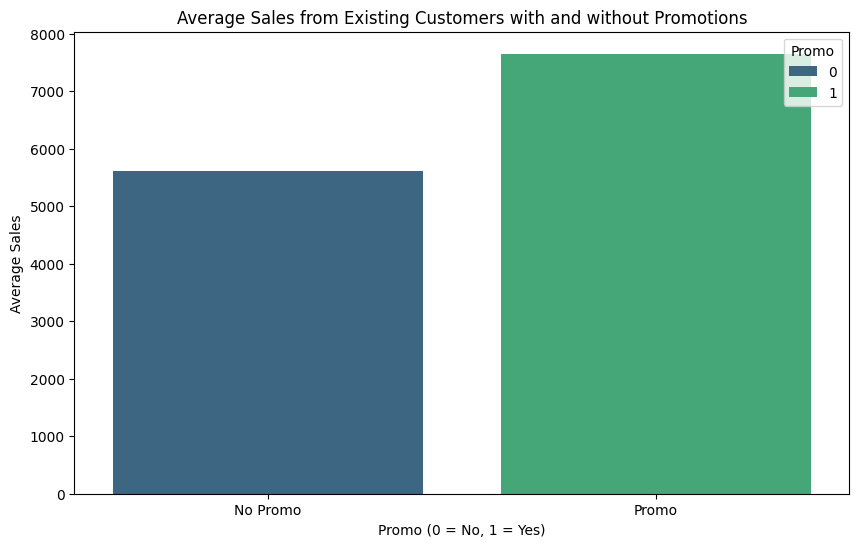

In [92]:
# Visualize average sales from existing customers during promotions
plt.figure(figsize=(10, 6))
sns.barplot(data=existing_customers_promo, x='Promo', y='Sales', hue='Promo', palette='viridis', dodge=False)
plt.title('Average Sales from Existing Customers with and without Promotions')
plt.xlabel('Promo (0 = No, 1 = Yes)')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.legend(title='Promo', loc='upper right')  # Optional: add legend if needed
plt.show()

 Could the promos be deployed in more effective ways? 

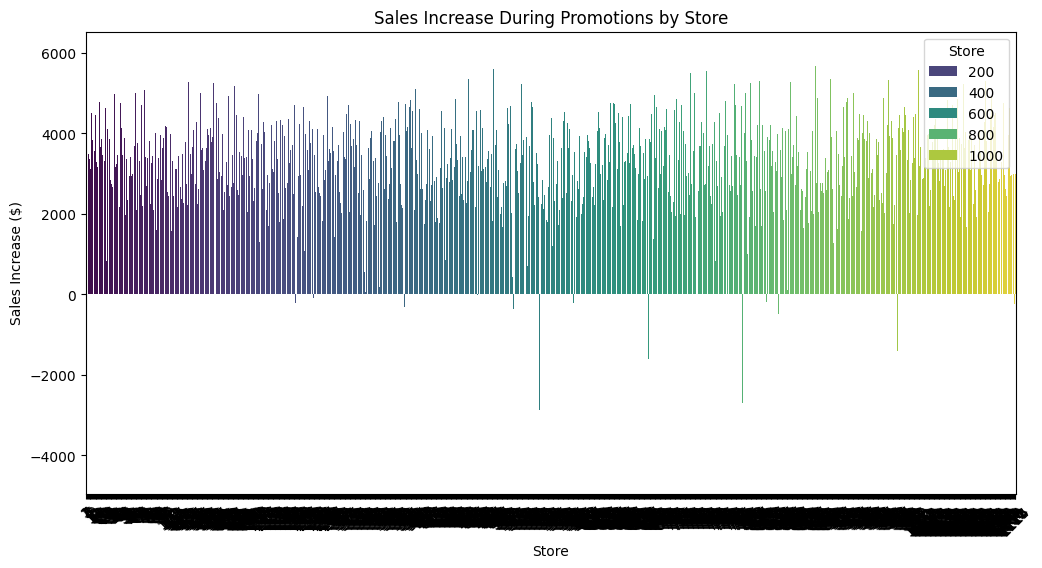

     Store  Sales_Increase
269    271     6006.505555
373    375     5923.492007
550    552     5685.110817
873    876     5673.565872
166    167     5612.336361
..     ...             ...
333    335      565.115789
510    512      426.668919
351    353      186.941454
839    842      113.324370
334    336       66.572854

[1092 rows x 2 columns]


In [94]:
# Calculate average sales by store and promo status
store_promo_effectiveness = train_data.groupby(['Store', 'Promo'])['Sales'].mean().reset_index()

# Pivot the data for easier comparison
store_promo_pivot = store_promo_effectiveness.pivot(index='Store', columns='Promo', values='Sales').reset_index()
store_promo_pivot.columns = ['Store', 'Sales_No_Promo', 'Sales_With_Promo']

# Calculate the difference in sales
store_promo_pivot['Sales_Increase'] = store_promo_pivot['Sales_With_Promo'] - store_promo_pivot['Sales_No_Promo']

# Sort by the sales increase
store_promo_pivot = store_promo_pivot.sort_values(by='Sales_Increase', ascending=False)

# Visualize sales increase during promotions by store
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Sales_Increase', data=store_promo_pivot, hue='Store', palette='viridis', dodge=False)
plt.title('Sales Increase During Promotions by Store')
plt.xlabel('Store')
plt.ylabel('Sales Increase ($)')
plt.xticks(rotation=45)
plt.legend(title='Store', loc='upper right')  # Optional: add legend if needed
plt.show()

# Identify stores with significant sales increase
effective_stores = store_promo_pivot[store_promo_pivot['Sales_Increase'] > 0]
print(effective_stores[['Store', 'Sales_Increase']])

 Trends of customer behavior during store opening and closing times

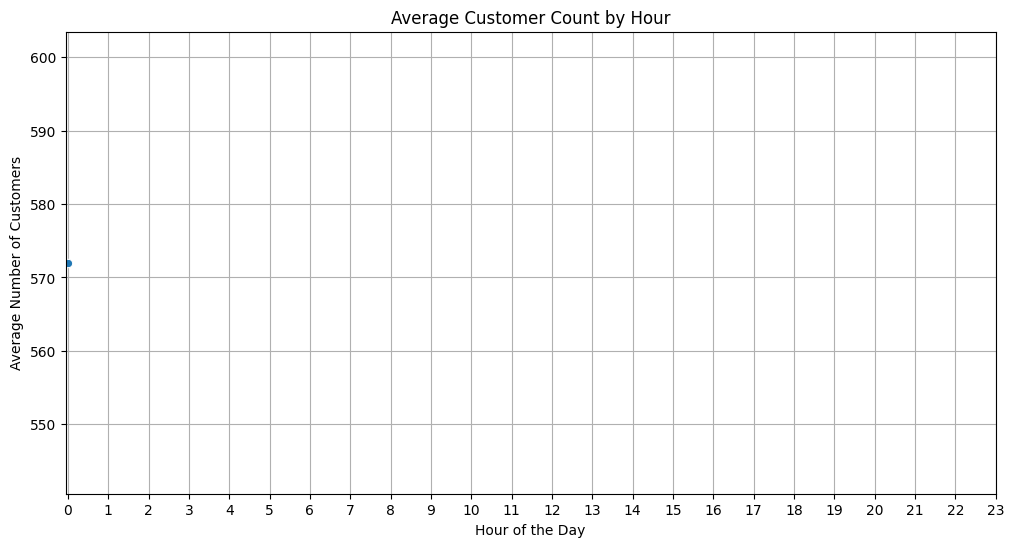

In [95]:
# Ensure 'Date' is a datetime type
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Extract hour from the Date for analysis
train_data['Hour'] = train_data['Date'].dt.hour

# Aggregate customer counts by hour
hourly_customers = train_data.groupby('Hour')['Customers'].mean().reset_index()

# Visualize customer behavior trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_customers, x='Hour', y='Customers', marker='o')
plt.title('Average Customer Count by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Number of Customers')
plt.xticks(range(0, 24))  # Show all hours
plt.grid()
plt.show()

 Which stores are open on all weekdays? How does that affect their sales on weekends? 

C:\Users\medha\AppData\Local\Temp\ipykernel_16840\314676232.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekend_sales.loc[:, 'OpenAllWeekdays'] = weekend_sales['Store'].isin(stores_open_all_weekdays)


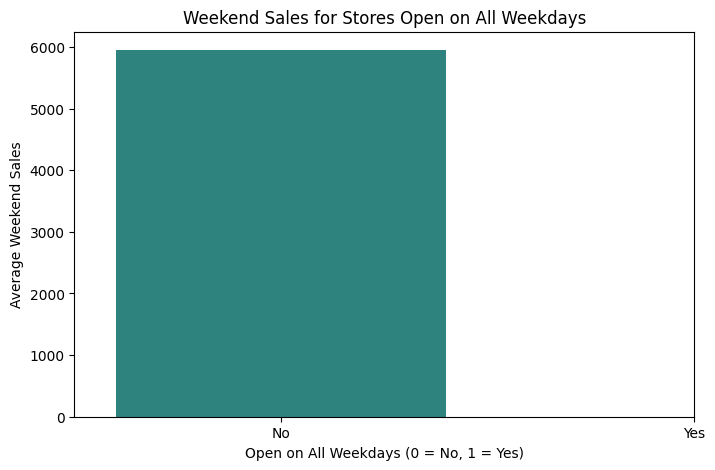

Stores open on all weekdays:
[]


In [114]:
# Identify stores open on all weekdays
weekdays = [0, 1, 2, 3, 4]  # Monday to Friday
stores_open_weekdays = train_data[train_data['DayOfWeek'].isin(weekdays)]
stores_open_weekdays = stores_open_weekdays.groupby('Store').filter(lambda x: len(x['DayOfWeek'].unique()) == 5)

# Get the unique list of stores open on all weekdays
stores_open_all_weekdays = stores_open_weekdays['Store'].unique()

# Filter sales data for weekends (Saturday and Sunday)
weekend_sales = train_data[train_data['DayOfWeek'].isin([5, 6])]  # Saturday=5, Sunday=6

# Avoid SettingWithCopyWarning by using .loc
weekend_sales.loc[:, 'OpenAllWeekdays'] = weekend_sales['Store'].isin(stores_open_all_weekdays)

# Aggregate sales for stores based on their open status
sales_comparison = weekend_sales.groupby('OpenAllWeekdays')['Sales'].mean().reset_index()

# Visualize the results
plt.figure(figsize=(8, 5))
sns.barplot(data=sales_comparison, x='OpenAllWeekdays', y='Sales', hue='OpenAllWeekdays', palette='viridis', legend=False)
plt.title('Weekend Sales for Stores Open on All Weekdays')
plt.xlabel('Open on All Weekdays (0 = No, 1 = Yes)')
plt.ylabel('Average Weekend Sales')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Print the stores open on all weekdays
print("Stores open on all weekdays:")
print(stores_open_all_weekdays)

 Check how the assortment type affects sales

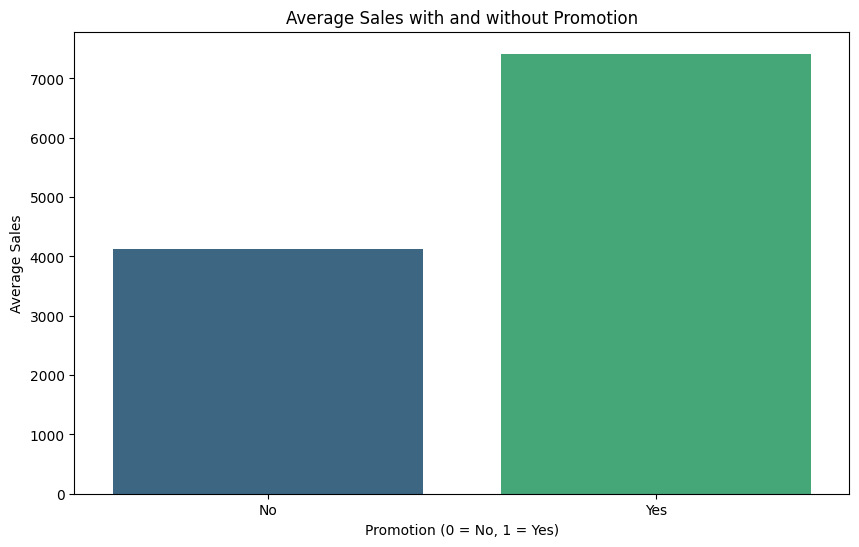

   Promo  Average Sales
0      0    4131.352004
1      1    7416.319742


In [120]:
# Group by the 'Promo' column and calculate the average sales
promo_sales = train_data.groupby('Promo')['Sales'].mean().reset_index()

# Rename the columns for clarity
promo_sales.columns = ['Promo', 'Average Sales']

# Visualize the results with hue
plt.figure(figsize=(10, 6))
sns.barplot(data=promo_sales, x='Promo', y='Average Sales', hue='Promo', palette='viridis', legend=False)
plt.title('Average Sales with and without Promotion')
plt.xlabel('Promotion (0 = No, 1 = Yes)')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Print the average sales for each promo status
print(promo_sales)

   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1   No Holiday   
1      2          5  2015-07-31   6064        625     1      1   No Holiday   
2      3          5  2015-07-31   8314        821     1      1   No Holiday   
3      4          5  2015-07-31  13995       1498     1      1   No Holiday   
4      5          5  2015-07-31   4822        559     1      1   No Holiday   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                   

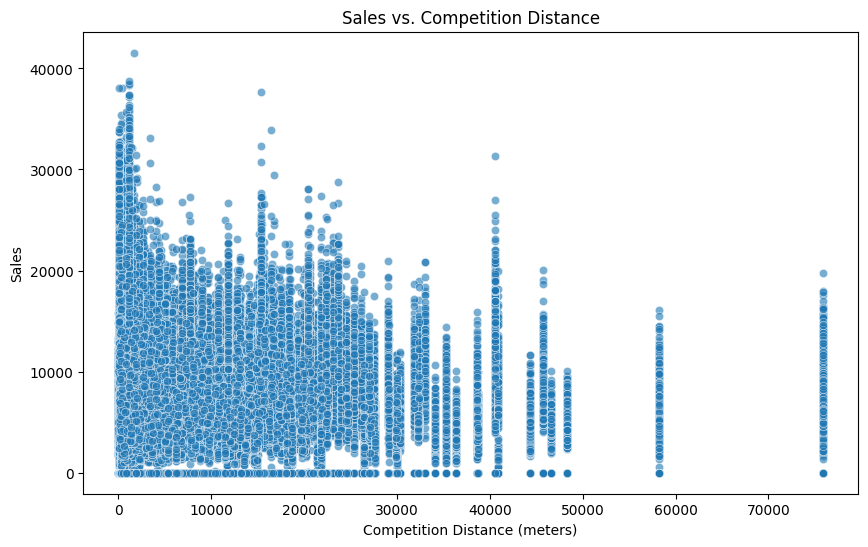

C:\Users\medha\AppData\Local\Temp\ipykernel_11864\3662407091.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_sales = merged_data.groupby('DistanceRange')['Sales'].mean().reset_index()
C:\Users\medha\AppData\Local\Temp\ipykernel_11864\3662407091.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=distance_sales, x='DistanceRange', y='Sales', palette='viridis')


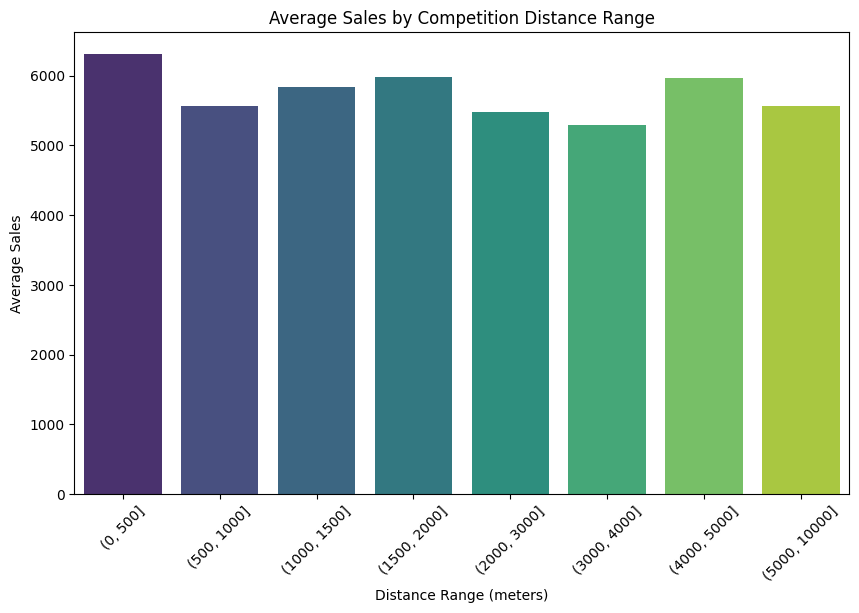

C:\Users\medha\AppData\Local\Temp\ipykernel_11864\3662407091.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=store_type_sales, x='StoreType', y='Sales', palette='viridis')


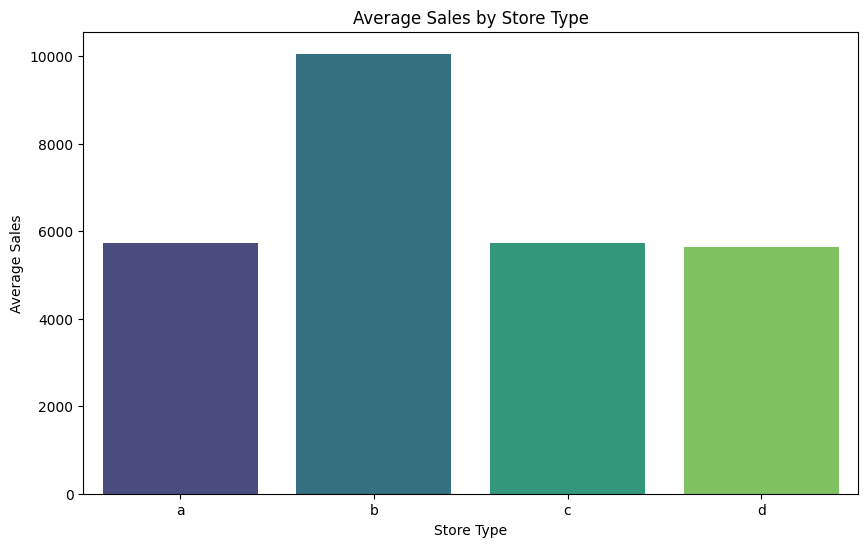

In [16]:
# Merge the datasets on the 'Store' column
merged_data = train_data.merge(store_data, on='Store', how='left')

# Check the merged DataFrame
print(merged_data.head())

# Scatter plot to visualize the relationship between Competition Distance and Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_data, x='CompetitionDistance', y='Sales', alpha=0.6)
plt.title('Sales vs. Competition Distance')
plt.xlabel('Competition Distance (meters)')
plt.ylabel('Sales')
plt.show()

# Analyze average sales by Competition Distance categories
distance_bins = [0, 500, 1000, 1500, 2000, 3000, 4000, 5000, 10000]  # Define your bins
merged_data['DistanceRange'] = pd.cut(merged_data['CompetitionDistance'], bins=distance_bins)

# Group by Distance Range and calculate average sales
distance_sales = merged_data.groupby('DistanceRange')['Sales'].mean().reset_index()

# Visualize average sales by distance range
plt.figure(figsize=(10, 6))
sns.barplot(data=distance_sales, x='DistanceRange', y='Sales', palette='viridis')
plt.title('Average Sales by Competition Distance Range')
plt.xlabel('Distance Range (meters)')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

# Further analysis based on StoreType if needed
store_type_sales = merged_data.groupby('StoreType')['Sales'].mean().reset_index()

# Visualize average sales by Store Type
plt.figure(figsize=(10, 6))
sns.barplot(data=store_type_sales, x='StoreType', y='Sales', palette='viridis')
plt.title('Average Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.show()

 How does the opening or reopening of new competitors affect stores? Check for stores with NA as competitor distance but later on have values for competitor distance

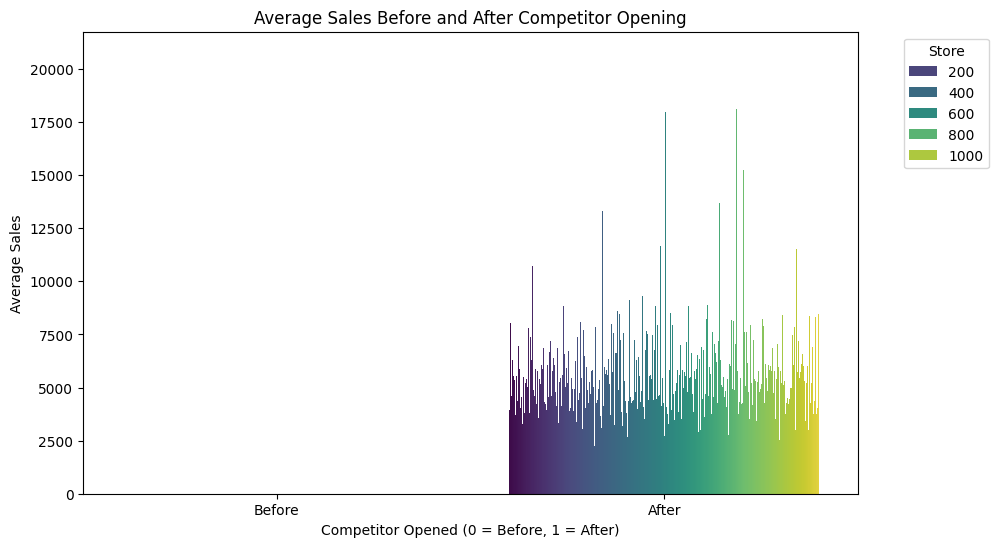

In [17]:
# Check for stores with initially NA CompetitionDistance
na_competitors = merged_data[merged_data['CompetitionDistance'].isna()]

# Identify the stores that later have valid competition distance
# Assuming 'Date' is in a datetime format, if not, convert it
merged_data['Date'] = pd.to_datetime(merged_data['Date'])

# Get stores that had NA and later have values
stores_with_competitors = merged_data[merged_data['Store'].isin(na_competitors['Store'])]

# Check for changes in CompetitionDistance
# We will filter for rows where CompetitionDistance is not NA and sort by Date
stores_with_competitors = stores_with_competitors[stores_with_competitors['CompetitionDistance'].notna()]
stores_with_competitors.sort_values(by=['Store', 'Date'], inplace=True)

# Now, we can analyze sales trends before and after the competitor opening
# Create a new column to indicate whether it's before or after the competitor opens
merged_data['CompetitorOpened'] = merged_data['CompetitionDistance'].notna()

# Compare sales before and after the competitor opens
sales_trends = merged_data.groupby(['Store', 'CompetitorOpened'])['Sales'].mean().reset_index()

# Visualize the sales trends
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_trends, x='CompetitorOpened', y='Sales', hue='Store', palette='viridis')
plt.title('Average Sales Before and After Competitor Opening')
plt.xlabel('Competitor Opened (0 = Before, 1 = After)')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['Before', 'After'])
plt.legend(title='Store', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

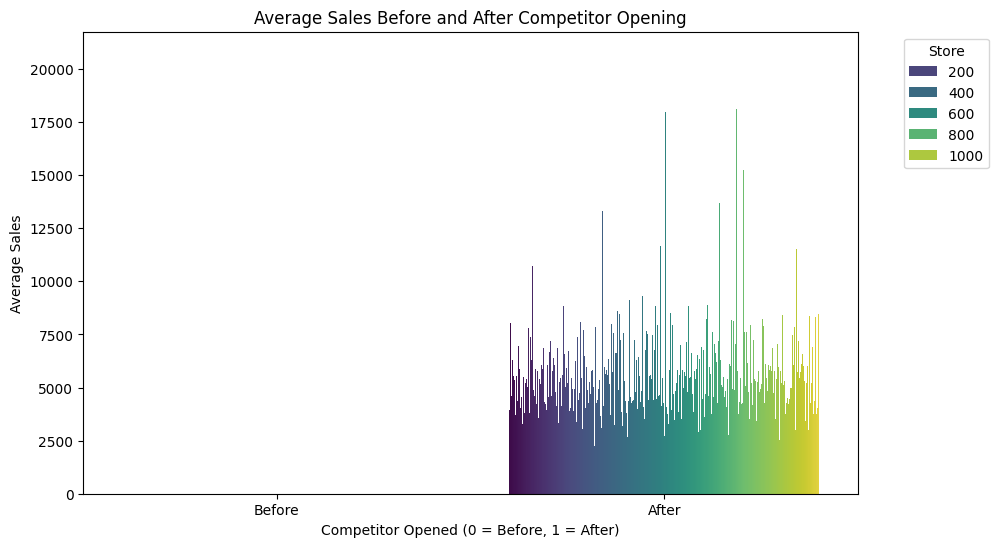

In [18]:
import logging

# Configure logging
logging.basicConfig(
    filename='analysis_log.txt',  # Log file name
    level=logging.INFO,            # Set logging level
    format='%(asctime)s - %(levelname)s - %(message)s'  # Log message format
)

# Log the start of the analysis
logging.info('Starting the analysis.')

# Load your training data
try:
    train_data = pd.read_csv('path_to_your_training_file.csv')  # Update with your path
    logging.info('Training data loaded successfully.')
except Exception as e:
    logging.error(f'Error loading training data: {e}')

# Load store data
try:
    store_data = pd.read_csv('path_to_your_store_file.csv')  # Update with your path
    logging.info('Store data loaded successfully.')
except Exception as e:
    logging.error(f'Error loading store data: {e}')

# Merge the datasets on the 'Store' column
try:
    merged_data = train_data.merge(store_data, on='Store', how='left')
    logging.info('Datasets merged successfully.')
except Exception as e:
    logging.error(f'Error merging datasets: {e}')

# Check for stores with initially NA CompetitionDistance
na_competitors = merged_data[merged_data['CompetitionDistance'].isna()]
logging.info(f'Found {len(na_competitors)} stores with NA CompetitionDistance.')

# Identify the stores that later have valid competition distance
merged_data['Date'] = pd.to_datetime(merged_data['Date'])
stores_with_competitors = merged_data[merged_data['Store'].isin(na_competitors['Store'])]
stores_with_competitors = stores_with_competitors[stores_with_competitors['CompetitionDistance'].notna()]
stores_with_competitors.sort_values(by=['Store', 'Date'], inplace=True)

# Log the number of stores with valid competition distance
logging.info(f'Found {len(stores_with_competitors)} stores with valid CompetitionDistance.')

# Compare sales before and after the competitor opens
merged_data['CompetitorOpened'] = merged_data['CompetitionDistance'].notna()
sales_trends = merged_data.groupby(['Store', 'CompetitorOpened'])['Sales'].mean().reset_index()

# Visualize the sales trends
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_trends, x='CompetitorOpened', y='Sales', hue='Store', palette='viridis')
plt.title('Average Sales Before and After Competitor Opening')
plt.xlabel('Competitor Opened (0 = Before, 1 = After)')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['Before', 'After'])
plt.legend(title='Store', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Log the completion of the analysis
logging.info('Analysis completed successfully.')